# Project 2 - Signal analysis using Fourier transform

#### 10024, 10106,10041

In [ ]:
#Importing useful libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import circulant
from scipy.fft import fft, ifft, fftshift
import scipy as sp
import csv
import pandas as pd

Technology and science go hand in hand, and one example of this is digital signal processing. Everything we handle is data, whether it is images from telescopes or the temperature in the seas and everything in between. In signal processing one problem is that the amount data often get too big to handle, but there exist mathematical ways to get around this. Especially Discrete Fourier Transform maps the signals into a sum of periodic functions. In this project we will go through much of the mathematical background, and use it in some practical examples.  

Firstly, we will derive some fundamental results from the Discrete Fourier Transform to build understanding which will be useful when implementing it to more difficult problems. 

# Task 1

## 1a)

We look at the function $e^{2\pi ikx}$ where $k\in\mathbb{Z}, \; x\in\mathbb{T}$ where $\mathbb{T}\equiv[0,1) $.\
We want to show that $\langle e^{2\pi ik\cdot},e^{2\pi ih\cdot}\rangle= \begin{cases} 
  1 & \text{if  $k= h$} \\ 
  0 &  \text{else} 
  \end{cases}$ for any $k,h\in\mathbb{Z}$ where the inner product is defined as: $\langle f,g \rangle= \int_0^1 f(x) \overline{g(x)}dx$\
  \
$$\langle e^{2\pi ik\cdot},e^{2\pi ih\cdot}\rangle=\int_0^1 e^{2\pi ik\cdot} e^{-2\pi ih\cdot}d\cdot=
\int_0^1 e^{2\pi i\cdot(k-h)}$$
$$k=h\implies\int_0^1 e^{2\pi i\cdot(k-h)}d\cdot=\int_0^1 e^{0}d\cdot=\int_0^1 d\cdot=1$$
$$k\neq h\implies \int_0^1 e^{2\pi i\cdot(k-h)}d\cdot= \frac{e^{2\pi i\cdot(k-h)}}{2\pi i(k-h)}\Biggr|_{0}^{1}=
\frac{e^{2\pi i(k-h)}-e^0}{2\pi i(k-h)}=0$$
Since $e^{2\pi in}=1, \;\forall\; n\in\mathbb{Z}$

## 1b)
Now we look at the functions $sin(2\pi n\cdot), \; m\in \{1,2,...,x\},\; cos(2\pi 0\cdot)$ and $cos(2\pi n\cdot),\;n\in\{1,2,...\}$.\

1. $\langle \sqrt{2}\sin(2\pi n\cdot),sqrt{2}\cos(2\pi m\cdot)\rangle$
2. $\langle \sqrt{2}\sin(2\pi n\cdot),\sqrt{2}\sin(2\pi m\cdot)\rangle$
3. $\langle \sqrt{2}\cos(2\pi n\cdot),\sqrt{2}\cos(2\pi m\cdot)\rangle$
\
\
We write $\sqrt{2}\sin(2\pi n\cdot)$ and $\sqrt{2}\cos(2\pi n\cdot)$ on complex form:
\
\
$$\sqrt{2}\sin(2\pi n\cdot)=\sqrt{2}\frac{e^{2\pi i n\cdot}-e^{-2\pi i n\cdot}}{2i},\;\;\;\sqrt{2}\cos(2\pi n\cdot)=\sqrt{2}\frac{e^{2\pi i n\cdot}+e^{-2\pi i n\cdot}}{2}$$

$(\ast)$ Note that the integral $\int_0^1 e^{2\pi i k\cdot}d\cdot=0\;\; \forall\; k\in\mathbb{Z}\setminus\{0\}$

1. 
$$\langle \sqrt{2}\sin(2\pi n\cdot),\sqrt{2}\cos(2\pi m\cdot)\rangle=
\int_0^1 \sqrt{2}\frac{e^{2\pi i n\cdot}-e^{-2\pi i n\cdot}}{2i} \overline{\sqrt{2}\frac{e^{2\pi i m\cdot}+e^{-2\pi i m\cdot}}{2}} d\cdot=\frac{2}{4i}\int_0^1 e^{2\pi i(n+m)\cdot}+e^{2\pi i(n-m)\cdot}-e^{2\pi i(m-n)\cdot}-e^{2\pi i(-n-m)\cdot}d\cdot$$


The terms $e^{2\pi i(n-m)\cdot}-e^{2\pi i(m-n)\cdot}$ cancel each other for $n=m$\
\
$$\implies \langle \sqrt{2}\sin(2\pi n\cdot),\sqrt{2}\cos(2\pi n\cdot)\rangle=0,\;\; n\in\{1,2,...\},\;m\in\{0,1,2,..\}$$

2.\
$$\langle \sqrt{2}\sin(2\pi n\cdot),\sqrt{2}\sin(2\pi m\cdot)\rangle=\int_0^1 \sqrt{2}\frac{e^{2\pi i n\cdot}-e^{-2\pi i n\cdot}}{2i} \overline{\sqrt{2}\frac{e^{2\pi i m\cdot}-e^{-2\pi i m\cdot}}{2i}} d\cdot=
\int_0^1 \sqrt{2}\frac{e^{2\pi i n\cdot}-e^{-2\pi i n\cdot}}{2i} \sqrt{2}\frac{e^{-2\pi i m\cdot}-e^{2\pi i m\cdot}}{-2i} d\cdot$$
$$=\frac{2}{2i(-2i)}\int_0^1 e^{2\pi i(n-m)\cdot}-e^{2\pi i(-n-m)\cdot}-e^{2\pi i(n+m)\cdot}+e^{2\pi i(m-n)\cdot}d\cdot$$
$$\frac{1}{2}\int_0^1 2e^0-e^{2\pi i(-n-m)\cdot}-e^{2\pi i(n+m)\cdot}d\cdot=\frac{1}{2}\int_0^1 2\; d\cdot=1,\;n=m,$$
$$\frac{1}{2}\int_0^1 e^{2\pi i(n-m)\cdot}-e^{2\pi i(-n-m)\cdot}-e^{2\pi i(n+m)\cdot}+e^{2\pi i(m-n)\cdot}d\cdot=0\;(\ast),\;\; n\neq m$$
$$\implies\langle \sqrt{2}\sin(2\pi n\cdot),\sqrt{2}\sin(2\pi m\cdot)\rangle= \begin{cases} 
  1 & n=m \\ 
  0 & n\neq m 
  \end{cases}$$
3.\
$$\langle \sqrt{2}\cos(2\pi n\cdot),\sqrt{2}\cos(2\pi m\cdot)\rangle=
\int_0^1 \sqrt{2}\frac{e^{2\pi i n\cdot}+e^{-2\pi i n\cdot}}{2} \overline{\sqrt{2}\frac{e^{2\pi i m\cdot}+e^{-2\pi i m\cdot}}{2}} d\cdot=\frac{1}{2}\int_0^1 e^{2\pi i(n-m)\cdot}+e^{2\pi i(-n-m)\cdot}+e^{2\pi i(n+m)\cdot}+e^{2\pi i(m-n)\cdot}d\cdot$$
$$\frac{1}{2}\int_0^1 e^{2\pi i(n-m)\cdot}+e^{2\pi i(-n-m)\cdot}+e^{2\pi i(n+m)\cdot}+e^{2\pi i(m-n)\cdot}d\cdot=0\;(\ast),\;\;n\neq m$$
$$\frac{1}{2}\int_0^1 e^{0}+e^{2\pi i(-n-m)\cdot}+e^{2\pi i(n+m)\cdot}+e^0d\cdot=\frac{1}{2}\int_0^1 2\;d\cdot=1,\;\; n=m\neq 0$$
$$\frac{1}{2}\int_0^1 4e^{0}d\cdot=\frac{1}{2}\int_0^1 4\;d\cdot=2,\;\; n=m= 0$$
$$\implies \langle \sqrt{2}\cos(2\pi n\cdot),\sqrt{2}\cos(2\pi m\cdot)\rangle=\begin{cases} 
  0 & n\neq m \\
  1 & n=m\neq 0 \\ 
  2& n=m=0
  \end{cases}$$

## 1c)
We are given the two spaces 
1. $\mathcal{T_n}:=\text{span}(e^{-2\pi in\cdot},..,e^{2\pi in\cdot})=\Big\{f\;\Big|\;f(x)=\sum_{k=-n}^n c_k e^{2\pi ikx},\;c_{-n}, c_{-n+1},...,c_n \in \mathbb{C}\Big\}$
2. $\mathcal{S_n}:=\text{span}(\cos(0\cdot),\cos(2\pi\cdot),...,\cos(n\pi\cdot, \sin(2\pi\cdot),..., \sin(n\pi\cdot))
=\Big\{f\;\Big|\;f(x)=\frac{a_0}{2}+\sum_{k=1}^{n} a_k \sin(2\pi k\cdot)+b_k \cos(2\pi k\cdot),\;a_0,\;a_k,\;b_k \in \mathbb{R}\Big\}$\
We can easely choose the vectors spanning the spaces as the orthonormal basis for $\mathcal{T_n}$ and $\mathcal{S_n}$ since we already hav shown that they are othonormal in b).\
\
We can also show that they span out the same space by looking at the basis for $\mathcal{T_n}$ on Euler form as such
$$e^{2\pi ik\cdot}=\cos(2\pi k\cdot)+isin(2\pi k\cdot)$$
To reach all $\cos(2\pi k\cdot)$ terms let $c_k=\frac{1}{2}$ and take $\frac{1}{2}e^{2\pi k\cdot}+\frac{1}{2}e^{-2\pi k\cdot}=\cos(2\pi k\cdot)$\
Similarly for $\sin(2\pi k\cdot)$ let $c_k=\frac{-i}{2}$ and obtain $\frac{-i}{2}e^{2\pi k\cdot}-\frac{-i}{2}e^{-2\pi k\cdot}=\sin(2\pi k\cdot)$\
This shows that we can reach the whole space of $\mathcal{S_n}$ with a linear combination of the basis for $\mathcal{T_n}$ and vice versa.

## 1d

We have that 

$$ f = \frac{a_0}{2} + \sum_{k=1}^{n}{a_k} cos(2 \pi k \cdot) + b_k sin(2 \pi k x \cdot) $$

$$ 2 \left< f,cos(2\pi j \cdot)\right> =  $$

$$ 2 \left< \frac{a_0}{2}, cos(2\pi j \cdot)\right> +2 \left< \sum_{k=1}^{n}{a_k} cos(2 \pi k \cdot), cos(2\pi j \cdot)\right> + 2\left< \sum_{k=1}^{n}{b_k} sin(2 \pi k \cdot), cos(2\pi j \cdot)\right> $$

Since we have linearity we get

$$ 2 \frac{a_0}{2} \left< 1, cos(2\pi j \cdot)\right> +2 \sum_{k=1}^{n} \left< {a_k} cos(2 \pi k \cdot), cos(2\pi j \cdot)\right> + 2 \sum_{k=1}^{n} \left< {b_k} sin(2 \pi k \cdot), cos(2\pi j \cdot)\right> $$

We can substitute $ 1 = cos (2 \pi 0 \cdot) $

$$ {a_0} \left< cos (2 \pi 0 \cdot), cos(2\pi j \cdot)\right> +2 \sum_{k=1}^{n} \left< {a_k} cos(2 \pi k \cdot), cos(2\pi j \cdot)\right> + 2 \sum_{k=1}^{n} \left< {b_k} sin(2 \pi k \cdot), cos(2\pi j \cdot)\right> $$

We have shown in 1b) that 

$$  \langle \sqrt{2}\sin(2\pi n\cdot),\sqrt{2}\cos(2\pi n\cdot)\rangle=0,\;\; n\in\{1,2,...\},\;m\in\{0,1,2,..\}$$

$$\langle \sqrt{2}\sin(2\pi n\cdot),\sqrt{2}\sin(2\pi m\cdot)\rangle= \begin{cases} 
  1 & n=m \\ 
  0 & n\neq m 
  \end{cases}$$
  
$$\langle \sqrt{2}\cos(2\pi n\cdot),\sqrt{2}\cos(2\pi m\cdot)\rangle=\begin{cases} 
  0 & n\neq m \\
  1 & n=m\neq 0 \\ 
  2& n=m=0
  \end{cases}$$

We then get that

$$  \langle \sin(2\pi n\cdot),\cos(2\pi n\cdot)\rangle=0,\;\; n\in\{1,2,...\},\;m\in\{0,1,2,..\}$$

$$\langle \sin(2\pi n\cdot),\sin(2\pi m\cdot)\rangle= \begin{cases} 
  \frac{1}{2} & n=m \\ 
  0 & n\neq m 
  \end{cases}$$
  
$$\langle \cos(2\pi n\cdot),\cos(2\pi m\cdot)\rangle=\begin{cases} 
  0 & n\neq m \\
  \frac{1}{2} & n=m\neq 0 \\ 
  1 & n=m=0
  \end{cases}$$
 
Hence
 
$$ \underbrace{{a_0} \left< cos (2 \pi 0 \cdot), cos(2\pi j \cdot)\right>}_{\begin{cases} 
  a_0 & j = 0 \\
  0 & j\neq 0
  \end{cases}}
  +2 \underbrace{ \sum_{k=1}^{n} \left< {a_k} cos(2 \pi k \cdot), cos(2\pi j \cdot)\right>}_{\begin{cases} 
  a_k & j = k \\
  0 & j\neq k
  \end{cases}} + 2 \underbrace{\sum_{k=1}^{n} \left< {b_k} sin(2 \pi k \cdot), cos(2\pi j \cdot)\right>}_0 $$
  
$$ \implies a_k = 2 \left< f,cos(2\pi k \cdot)\right>, k = 1,2,...n $$


Simmilar for $b_k$ we get

$$ 2 \left< f,sin(2\pi j \cdot)\right> =  $$

$$ {a_0} \left< cos (2 \pi 0 \cdot), sin(2\pi j \cdot)\right> +2 \sum_{k=1}^{n} \left< {a_k} cos(2 \pi k \cdot), sin(2\pi j \cdot)\right> + 2 \sum_{k=1}^{n} \left< {b_k} sin(2 \pi k \cdot), sin(2\pi j \cdot)\right> $$

and again from 1b) we get 

$$ \underbrace{{a_0} \left< cos (2 \pi 0 \cdot), sin(2\pi j \cdot)\right>}_0
  +2 \underbrace{ \sum_{k=1}^{n} \left< {a_k} cos(2 \pi k \cdot), sin(2\pi j \cdot)\right>}_0 + 2 \underbrace{\sum_{k=1}^{n} \left< {b_k} sin(2 \pi k \cdot), sin(2\pi j \cdot)\right>}_{\begin{cases} 
  b_k & j = k \\
  0 & j\neq k
  \end{cases}} $$
  
$$ \implies b_k = 2 \left< f,sin(2\pi k \cdot)\right>, k = 1,2,...n $$

## 1e)

We want to show that 

$$c_k(f) \approx \hat{f} := \frac{1}{N} \sum_{j=0}^{N-1}f_je^{\frac{-2\pi i j k}{N}} $$

We have shown that 

$$ c_k(f) = \int_{-\frac{1}{2}}^{\frac{1}{2}} f(x) e^{-2\pi i k x} dx $$

Since we have equally spaced $x_j$ with step length $\Delta_x = \frac{1}{N}$ we can use the trapezoidal rule for uniform grid.

$$ \int_a^b = \Delta_x (\sum_{j=1}^{N-1} f(x_j) + \frac{f(x_n) + f(x_0)}{2} ) $$

We get 

$$ \int_{-\frac{1}{2}}^{\frac{1}{2}} f(x) e^{-2\pi i k x} dx \approx \frac{1}{N}(\sum_{j=1}^{N-1} f(x_j) e^{-2\pi i k x_j}  + \frac{f(x_n)e^{-2\pi i k x_n} + f(x_0) e^{-2\pi i k x_0}}{2} )  $$

Since the function $f$ is a periodic function with $f(x_j + 1) = f(x_j) $
we get that 

$$f(x_n) = f(x_0 + N \frac{1}{N}) = f(x_0 + 1) = f(x_0) $$

and we have that 

$$ e^{-2\pi i k x_n} = e^{-2\pi i k (x_0 + 1)} = e^{-2\pi i k x_0} \underbrace{e^{-2\pi i k  }}_{=1} = e^{-2\pi i k x_0} $$

$$ \implies \frac{1}{N}(\sum_{j=1}^{N-1} f(x_j) e^{-2\pi i k x_j}  + \frac{f(x_n)e^{-2\pi i k x_0} + f(x_0) e^{-2\pi i k x_n}}{2} ) = \frac{1}{N}(\sum_{j=1}^{N-1} f(x_j) e^{-2\pi i k x_j}  + \frac{2 f(x_0) e^{-2\pi i k x_0}}{2} ) = 
$$

$$
\frac{1}{N}(\sum_{j=1}^{N-1} f(x_j) e^{-2\pi i k x_j}  +  f(x_0) e^{-2\pi i k x_0} ) = 
\frac{1}{N}(\sum_{j=0}^{N-1} f(x_j) e^{-2\pi i k x_j}) 
$$

We have defined $x_j = \frac{j}{N} $ and $f(x_j) = f_j $ so finally

$$c_k(f)  \approx \hat{f}_k := \frac{1}{N}(\sum_{j=0}^{N-1} f_j e^{-\frac{2\pi i k j}{N}}) $$

We also want to prove $ \hat{f}_k$ is N periodic.

$$\hat{f}_{(k+N)} := \frac{1}{N}(\sum_{j=0}^{N-1} f_j e^{-\frac{2\pi i (k+N) j}{N}}) $$

$$ =\frac{1}{N}(\sum_{j=0}^{N-1} f_j e^{-2\pi i (k/N+N/N) j}) $$

$$=\frac{1}{N}(\sum_{j=0}^{N-1} f_j e^{-2\pi i (k/N+1) j})  $$

$$ =\frac{1}{N}(\sum_{j=0}^{N-1} f_j e^{-2\pi i k j/N} \underbrace{e^{2\pi i j}}_1 $$

$$ = \frac{1}{N}(\sum_{j=0}^{N-1} f_j e^{-2\pi i k j/N} =\hat{f}_k $$

Hence $\hat{f}_k$ is $ N $ periodic.


We have that $C_k(f) = \int_{-\frac{1}{2}}^{\frac{1}{2}} f(x) e^{-2 \pi i k x } $ we see that for $ k \rightarrow \infty $ $e^{-2 \pi i k x } \rightarrow 0$.
So $C_k(f)$ approaches zero for large $n$. Meanwhile $\hat{f}_k$ is periodic, and will not approach $0$. This means for large N, the approximation is bad.

## 1f)
Given the following sum we want to prove:
$$ \frac{1}{N}\sum_{j=0}^{N-1} e^{-2\pi i \frac{k}{N}j}=\begin{cases} 
  1 & k\mod N \equiv 0 \\
  0 & else
  \end{cases},\;\; N\in\mathbb{N},\;\; k\in\mathbb{Z}$$
The first case is quite easy to prove since $k\mod N \equiv 0 \implies \frac{k}{N}\in \mathbb{Z}\implies e^{-2\pi i \frac{k}{N}j}=1\; \forall\; j$
$$\implies\frac{1}{N}\sum_{j=0}^{N-1} e^{-2\pi i \frac{k}{N}j}=\frac{1}{N}\sum_{j=0}^{N-1} 1=\frac{N}{N}=1$$
If we look at the second case we can extract the $j$ from the exponent and recognize it as a finite geometric sum:
$$\frac{1}{N}\sum_{j=0}^{N-1} e^{-2\pi i \frac{k}{N}j}=\frac{1}{N}\sum_{j=0}^{N-1} (e^{-2\pi i \frac{k}{N}})^j=
\frac{1}{N}\frac{1-(e^{-2\pi i \frac{k}{N}})^N}{1-e^{-2\pi i \frac{k}{N}}}=\frac{1}{N}\frac{1-e^{-2\pi i \frac{kN}{N}}}{1-e^{-2\pi i \frac{k}{N}}}$$
$$=\frac{1}{N}\frac{1-e^{-2\pi i k}}{1-e^{-2\pi i \frac{k}{N}}}=\frac{1}{N}\frac{1-1}{1-e^{-2\pi i \frac{k}{N}}}=0$$

## 1g)
We introduce the vector $\textbf{a}=(a_0, a_1,...,a_{N-1})^T$ and the circulant matrix given by 
$$circ\;\textbf{a}=\begin{bmatrix}
a_0 & a_{N-1} & \ldots & a_2 & a_1\\
a_1 & a_0 & \ldots & a_3 & a_2\\
\vdots & &\ddots &\vdots\\
a_{N-1} & a_{N-2} & \ldots & a_1 & a_0
\end{bmatrix}$$



Let $w_N=e^{-2\pi i/N}$ s.t $\mathcal{F}_N=\frac{1}{N}\{w^{lk}_N\}_{k,l=0}^N$. Now look at the number 
$$\lambda(w)=\frac{1}{N}(a_0+a_1w+...+a_{N-2}w^{N-2}+a_{N-1}w^{N-1})$$
Next consider what happens if we multiply by $1, w, ..., w^{N-1}$
$$\lambda w=\frac{1}{N}(a_{N-1}+a_0w+...+a_{N-3}w^{N-2}+a_{N-2}w^{N-1})$$
$$\lambda w^2=\frac{1}{N}(a_{N-2}+a_{N-1}w+...+a_{N-4}w^{N-2}+a_{N-3}w^{N-1})$$
$$\lambda w^{N-1}=\frac{1}{N}(a_1+a_{2}w+...+a_{N-1}w^{N-2}+a_{0}w^{N-1})$$
\
We can rewrite this as  $$N\lambda(w)(1,\;w,...,w^{N-1})=(1,\;w,...,w^{N-1})\;circ\;\textbf{a}$$
\
Do this for all $w=1, w_N, w_N^2,...,w_N^{N-1}$ and we get
$$Ndiag(\lambda(w))\mathcal{F}_N=\mathcal{F}_N circ\;\textbf{a}$$
where $diag(\lambda(w))=diag(\mathcal{F}_N\textbf{a})=diag(\textbf{â})$\
We then obtain by taking inverse Fourier on both sides
$$circ\;\textbf{a}=N\mathcal{F}_N^{-1}diag(\hat{\textbf{a}})\mathcal{F}_N$$
\
We now want to fin the inverse of $\mathcal{F}_N$ s.t. $\mathcal{F}_N\mathcal{F}_N^{-1}=I_N$. 
Consider the matrix given by $A=\Big(e^{2\pi ikl/N}\Big)_{k,l=0}^{N-1}$. Now look at each individual entry of $\mathcal{F}_NA$.
$$(\mathcal{F}_NA)_{kl}=\frac{1}{N}\sum_{m=0}^{N-1}e^{-2\pi ikm/N}e^{2\pi iml/N}=\frac{1}{N}\sum_{m=0}^{N-1}e^{-2\pi im(k-l)/N}$$
From 1f) we have that $(\mathcal{F}_NA)_{kl}=\begin{cases} 1 & k=l \\ 0 & k \neq l \end{cases}$\
Hence $\mathcal{F}_NA=I_N \implies\; A=\mathcal{F}_N^{-1}$. We can also see that $\mathcal{F}_N^{-1}=N\overline{\mathcal{F}_N}$
$$\implies\;circ\;\textbf{a}=N^2\overline{\mathcal{F}_N}diag(\hat{\textbf{a}})\mathcal{F}_N$$

## 1h)

In [46]:
#Function that gets N discrete function values of a function f
def transform(f, N, start=0.0):
    
    points = np.linspace(start,start+1, N,  endpoint=False)
    function = np.zeros(N)
    for count, value in enumerate(points):
        function[count] = f(value)
    return function, points


In [47]:
def ex_f(x):
    return x

numb = transform(ex_f, 5) #Would expect this to give (0, 0.2, 0.4, 0.6, 0.8)
print(numb)

(array([0. , 0.2, 0.4, 0.6, 0.8]), array([0. , 0.2, 0.4, 0.6, 0.8]))


In [48]:
#Define the functions
def f1(x):
    return np.sin(8*np.pi*x)

def f2(x):
    return np.sin(32*np.pi*x) + np.cos(128*np.pi*x)

def f3(x):
    return x

def f4(x):
    return 1 - np.abs(x)

In [49]:
#plots the discrete function, and it corresponding fft
def myplot(N, start = 0.0):
    trans_f1, xvals = transform(f1, N, start)
    trans_f2, xvals= transform(f2, N, start)
    trans_f3, xvals = transform(f3, N, start)
    trans_f4, xvals = transform(f4, N, start)
    fft_f1 = sp.fft.fft(trans_f1)/N
    fft_f2 = sp.fft.fft(trans_f2)/N
    fft_f3 = sp.fft.fft(trans_f3)/N
    fft_f4 = sp.fft.fft(trans_f4)/N
    
    fig, ax = plt.subplots(4,2, figsize=(10, 8))
    fig.suptitle(f'N = {N}', fontsize= '25')
    ax[0,0].set_title(r'$f$', fontsize = '15')
    ax[0,1].set_title(r'$\hat{f}$', fontsize = '15')
    ax[0,0].set_ylabel('F1', size= 15, rotation = 0)
    ax[1,0].set_ylabel('F2', size= 15, rotation = 0)
    ax[2,0].set_ylabel('F3', size= 15, rotation = 0)
    ax[3,0].set_ylabel('F4', size= 15, rotation = 0)
    ax[0,0].plot(xvals, trans_f1)
    ax[0,1].plot(xvals, fft_f1.real, label='Real')
    ax[0,1].plot(xvals, fft_f1.imag, label='Imag')
    ax[0,1].legend()
    ax[1,0].plot(xvals, trans_f2)
    ax[1,1].plot(xvals, fft_f2.real, label='Real')
    ax[1,1].plot(xvals, fft_f2.imag, label='Imag')
    ax[1,1].legend()
    ax[2,0].plot(xvals, trans_f3)
    ax[2,1].plot(xvals, fft_f3.real, label='Real')
    ax[2,1].plot(xvals, fft_f3.imag, label='Imag')
    ax[2,1].legend()
    ax[3,0].plot(xvals, trans_f4)
    ax[3,1].plot(xvals, fft_f4.real, label='Real')
    ax[3,1].plot(xvals, fft_f4.imag, label='Imag')
    ax[3,1].legend()
    plt.show()

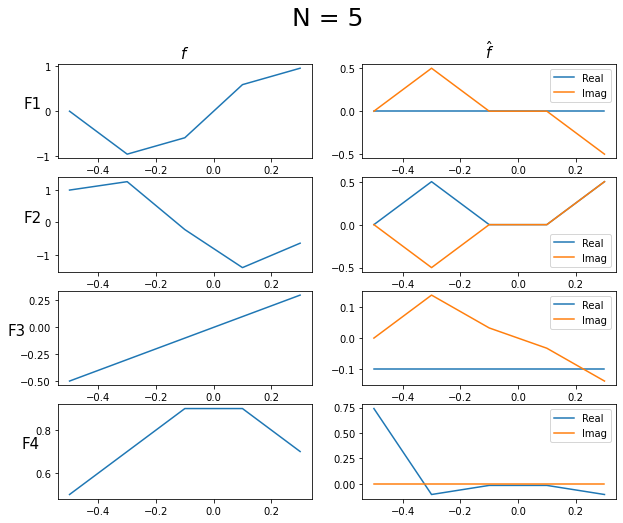

In [50]:
myplot(5, -1/2)

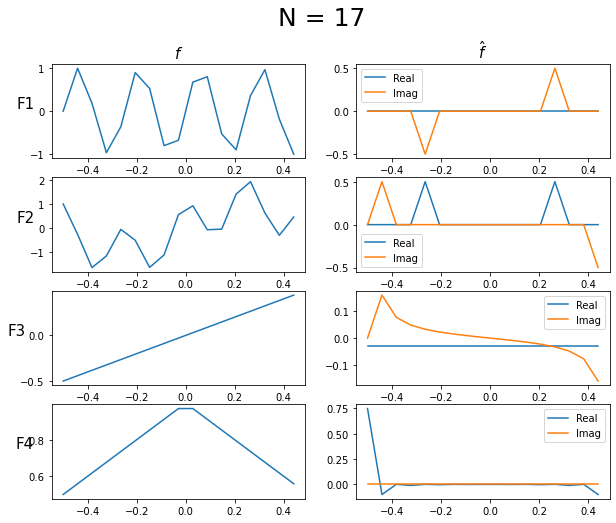

In [51]:
myplot(17, -1/2)

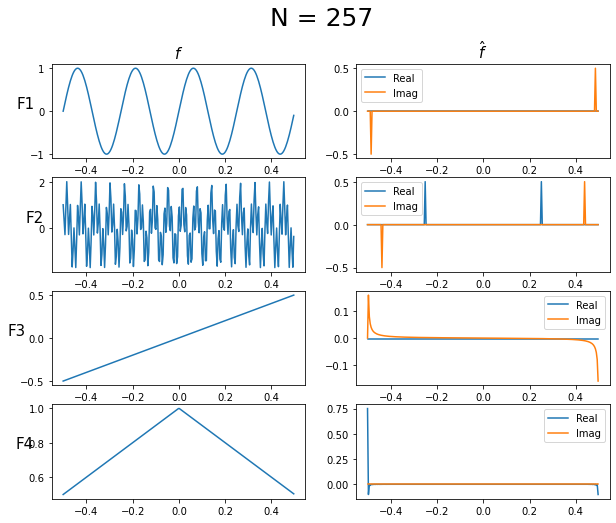

In [52]:
myplot(257, -1/2)

We look if $\textbf{f}$ is a good approximation to $f$. $\textbf{f}_1$ and $\textbf{f}_2$ is only a good approximation to $f_1$ for $N=257$. $f_3$ is linear, so $\textbf{f}_3$ is a good approximation for all $N=5,17, 257$. $\textbf{f}_4$ is a good approximation to $f_4$ for $N=17$ everywhere except for around $x=0$, but for $N=257$, $\textbf{f}_4$ is a good approximation everywhere on the interval. 

## 1i)

Using the fourier series, $S_N(x) = \frac{a_0}{2} + \sum_{k= 1}^{n}(a_k cos(2\pi k x) + b_k sin(2 \pi k x)) $ and since $f_2(x) = sin(32 \pi x)+ cos(128 \pi x)$, there is only one sine and one cosine term in the sum that is non-zero. 
$a_{64} = 1 $ and $ b_{16} = 1$.

With $a_k$ and $b_k$ we can also find $c_k$, with the formula $c_k = \frac{a_k - Sign(k)i b_k}{2}$ 
$ \Rightarrow c_{16} = \frac{1-0i}{2} = \frac{1}{2}$ , $c_{64} = \frac{0 - 1i}{2} = \frac{-i}{2}, c_{-16} = \frac{1+0i}{2} = \frac{1}{2}$ and $c_{-64} = \frac{0 + 1i}{2} = \frac{i}{2}$

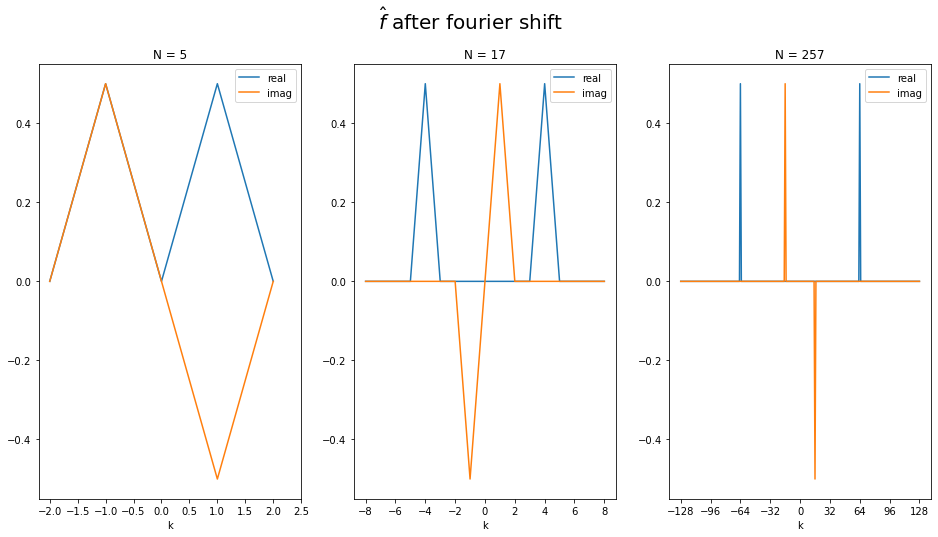

In [53]:
#the same fft as above, but its values is now shifted one half. 
fig, ax = plt.subplots(1,3, figsize=(16, 8))
fig.suptitle(r"$\hat{f}$ after fourier shift", fontsize=20)
N = [5, 17, 257]

for i in range(3):
    tick = ((N[i]-1)/(8))
    trans, r= transform(f2,N[i], -1/2)
    xvals = []
    for k in range(-(N[i]-1)//2, (N[i]+1)//2):
        xvals.append(k)
    fft = sp.fft.fft(trans)/N[i]
    shifted = sp.fft.fftshift(fft)
    ax[i].plot(xvals, shifted.real, label='real')
    ax[i].plot(xvals, shifted.imag, label='imag')
    ax[i].set_xticks(np.arange(min(xvals), max(xvals)+1, tick))
    ax[i].set_xlabel("k")
    ax[i].set_title(f'N = {N[i]}')
    ax[i].legend()
plt.show()

Scipy.fft.fftshift() shifts the first half of the coefficients to the back half. That corresponds to shifting the coefficients for the negative k to the front. 
In other words the it shifts our x-axis like: $$\left( 0, c_{1}(f), c_{2}(f), ..., c_{\frac{N-1}{2}}(f), c_{-\frac{N-1}{2}}(f), ...,c_{-2}(f), c_{-1}(f) \right)  \rightarrow \left( c_{-\frac{N-1}{2}}(f), ...,c_{-2}(f), c_{-1}(f), 0, c_{1}(f), c_{2}(f), ..., c_{\frac{N-1}{2}}(f) \right)$$

With this shift it is easier to see what our complex Fourier coefficients are. As we can see from the plots with $N=257$ the transforms has four spikes which is equal to the complex Fourier coefficients we found before the plot. The second term of $f_2$ is $cos(128 \pi x)$ which corresponds to the Fourier coefficient $c_{\pm 64}$. So to remove the second summand of $f_2$ we can just set the  coefficients $c_{\pm 64} = 0$, and we are left with  $f_2 = sin(32 \pi x)$. 

For $N=5$ and $N=17$ the sampling rate is too low to detect periodicity for such small periods as $cos(128 \pi x)$ has. In these cases, the coefficients found by looking at the plot it not the same as the ones we found analytically. With a closer look this is not odd at all since, $c_{\pm 64}$ is not even computed. 


A usefull aspect of the discrete fourier coefficents are that we can use them to interpolate other functions. We are now ready to work on the theory of constructing such an interpolating function.

# Task 2

## 2a)

We want to show

$$ \hat{f_k} = \sum_{l \epsilon \mathbb{Z} } c_{k+lN} $$

We have from 1e) 

$$ \hat{f} := \frac{1}{N} \sum_{j=0}^{N-1}f_je^{\frac{-2\pi i j k}{N}} $$

and 

$$ f_j = \sum_{r \epsilon \mathbb{Z}}c_r e^{2\pi i r x_j} $$

If we insert $f_j$ in $\hat{f} $ and replace $x_j = \frac{j}{N} $ we get:

$$ \hat{f} := \frac{1}{N} \sum_{j=0}^{N-1} (\sum_{r \epsilon \mathbb{Z}}c_r e^{2\pi i r j/N})e^{{-2\pi i j k/N}} $$

$$ = \frac{1}{N} \sum_{j=0}^{N-1} \sum_{r \epsilon \mathbb{Z}}c_r e^{2\pi i r j/N}e^{{-2\pi i j k/N}} $$

$$ = \frac{1}{N} \sum_{j=0}^{N-1} \sum_{r \epsilon \mathbb{Z}}c_r e^{2\pi i r j/N -2\pi i j k/N} $$

$$ = \frac{1}{N} \sum_{j=0}^{N-1} \sum_{r \epsilon \mathbb{Z}}c_r e^{2\pi i j (r-k)/N } $$


$$ = \frac{1}{N} \sum_{r \epsilon \mathbb{Z}} c_r  \sum_{j=0}^{N-1}e^{2\pi i j (r-k)/N } $$

And from 1f) we get

$$ \frac{1}{N} \sum_{r \epsilon \mathbb{Z}} c_r  \underbrace{\sum_{j=0}^{N-1}e^{2\pi i j (r-k)/N }}_{\begin{cases} 
  1 & (r-k) mod N \equiv 0 \\
  0 & else
  \end{cases}} $$
  
We introduce $l$ where

$$ \frac{r-k}{N} = l $$ 

$$ r = k + lN $$

We then get

$$ \frac{1}{N} \sum_{r \epsilon \mathbb{Z}} c_r  \underbrace{\sum_{j=0}^{N-1}e^{2\pi i j l}}_{\begin{cases} 
  1 & l \epsilon \mathbb{Z}\\
  0 & else
  \end{cases}} $$
  
$$ = \frac{1}{N} \sum_{l \epsilon \mathbb{Z}} c_{k+ln} \underbrace{\sum_{j=0}^{N-1} 1}_N $$ 

$$ = \frac{N}{N} \sum_{l \epsilon \mathbb{Z}} c_{k+ln} $$

$$ = \sum_{l \epsilon \mathbb{Z}} c_{k+ln} \quad \quad \square $$

## 2b)
Given the fourier coefficients $c_k(f),\;k\in\mathbb{Z}$ we want to show that $c_k(\tau_N f)=e^{-2\pi ik}f,\;\forall \;k$ and furthermore find a formula for $c_k(\tau_N^j f)$.
$$c_k(\tau_Nf)=\frac{1}{N}\sum_{j=0}^{N-1}\tau_Nf_j e^{2\pi ijk/N}=\frac{1}{N}\sum_{j=0}^{N-1}f_{j+1} e^{2\pi ijk/N}$$
$$=\frac{1}{N}\sum_{j=0}^{N-1}f_{j+1} e^{2\pi i(j+1)k/N}e^{-2\pi i k/N}$$
Note that for $j=N-1$ we have $f_N=f_0$ and $e^{2\pi Nk/N}=e^{2\pi ik}=e^0\;\forall\;k\in\mathbb{Z}$
$$\implies c_k(\tau_Nf)=e^{-2\pi ik/N}c_k(f)$$
For an arbitrary $c_k(\tau_N^mf)$ we get
$$\frac{1}{N}\sum_{j=0}^{N-1}\tau_N^mf_j e^{2\pi ijk/N}=\frac{1}{N}\sum_{j=0}^{N-1}f_{j+m} e^{2\pi ijk/N}$$
$$=\frac{1}{N}\sum_{j=0}^{N-1}f_{j+m} e^{2\pi i(j+m)k/N}e^{-2\pi imk/N}$$
Since $f$ still is $N$-periodic we can show that for $j+m>N, \;e^{2\pi i(j+m)k/N}=e^{2\pi i(j+m-N)k/N}e^{2\pi ikN/N}=e^{2\pi i(j+m-N)k/N}\implies e^{2\pi i(j+m)k/N}$ is also\
$N$-periodic.\
We can then show that
$$\frac{1}{N}\sum_{j=0}^{N-1}f_{j+m} e^{2\pi i(j+m)k/N}=\frac{1}{N}\sum_{j=0}^{N-1}f_{j} e^{2\pi ijk/N}=c_k(f)$$
and obtain $c_k(\tau_N^mf)=e^{-2\pi imk/N}c_k(f)$

## 2c)

Let $g(x)=\sum_{j=0}^{N-1}a_jf(x-\frac{j}{N})\in V_{N,f}, V_{N,f}=\text{span}(f, \tau_N f, \tau_N^2,...,\tau_N^{N-1})$\
We want to show that $\tau_Ng\in V_{N,f}$
$$\tau_Ng=\tau_N\sum_{j=0}^{N-1}a_jf(x-\frac{j}{N})=\sum_{j=0}^{N-1}a_j\tau_Nf(x-\frac{j}{N})$$
$$=\sum_{j=0}^{N-1}a_jf(x-\frac{j+1}{N})$$
Since $f$ is $N$-periodic $f(x+N)=f(x)\implies \tau_N g$ is still a linear combination of the vectors spanning $V_{N,f}$ hence $\tau_Ng\in V_{N,f}$.\
We see here that the coefficients will be the same as for $g(x)$, but shifted by $\frac{1}{N}$.

## 2d)

We want to show that the matrix 
$$G=\Big(\langle\tau_N^kf,\tau_N^jf\rangle\Big)_{k,j=0}^{N-1}\;\in\;\mathbb{C}^{NxN}$$
is a circulant matrix.\
By parcevals identity $\langle f,g\rangle=\sum_{k\in \mathbb{Z}} c_k(f)\overline{c_k(g)}$.
From 2b) we have that $c_k(\tau_N^nf)=e^{-2\pi ikn/N}c_k(f)$
$$\implies \langle\tau_N^kf,\tau_N^jf\rangle=\sum_{n\in\mathbb{Z}}e^{-2\pi ikn/N}c_n(f)\overline{e^{-2\pi ijn/N}c_n(f)}=
\sum_{n\in\mathbb{Z}}e^{-2\pi in(k-j)/N}|c_n(f)|^2$$
$$\implies G=\Big(\sum_{n\in\mathbb{Z}}e^{-2\pi in(k-j)/N}|c_n(f)|^2\Big)_{k,j=0}^{N-1}$$
This will result in a circulant matrix since n is independent of index and the k-j will define the entries which is the form of a circulant matrix.\



\
The diagonal matrix will be given by 
$$\mathcal{F}_N\sum_{n\in\mathbb{Z}}e^{-2\pi in(k-j)/N}|c_n(f)|^2=
\Big(\frac{1}{N}\sum_{k=0}^{N-1}e^{2\pi inj/N}\sum_{n\in\mathbb{Z}}e^{-2\pi ink
/N}|c_n(f)|^2\Big)_{j=0}^{N-1}$$
$$=\Big(\sum_{n\in\mathbb{Z}}|c_n(f)|^2\frac{1}{N}\sum_{k=0}^{N-1}e^{-2\pi in(k-j)/N}\Big)_{j=0}^{N-1}=
\begin{cases}\sum_{n\in\mathbb{Z}} |c_n(f)|^2 & k-j\;\text{mod}\;N\equiv 0\\ 0 & \text{else}\end{cases}$$

Which is the case for $j = k$, since $j,k < N$. 

## 2e)
We want to show that $g\in V_{N,f}$ is equivalent to the statement
$$c_k(g)= \sum_{j=0}^{N-1}a_je^{-2\pi i jk/N} c_k(f)$$
We use the definition of $c_k(f)=\langle f, e^{2\pi i\cdot}\rangle$
$$g(\cdot)=\sum_{j=0}^{N-1}a_jf(\cdot-\frac{j}{N})$$
$$\implies\langle g(\cdot),e^{2\pi i\cdot}\rangle =\langle \sum_{j=0}^{N-1}a_jf(\cdot-\frac{j}{N}), e^{2\pi i\cdot}\rangle
=\sum_{j=0}^{N-1}a_j c_k(\tau_N^jf)=\Big (\sum_{j=0}^{N-1}a_j e^{-2\pi ijk/N}\Big )c_k(f)$$
\
We further want to show that this is equal to $Nâ_hc_k(f)$ where $\textbf{â}$ denotes the discrete Fourier transform of $\textbf{a}$.
The definition of discrete Fourier transform of some variable is given by $\hat{x}_k=\frac{1}{N}\sum_{j=0}^{N-1}x_j e^{-2\pi ijk}$
If we do this for $\textbf{a}$ we obtain 
$$\textbf{â}_h=\frac{1}{N}\sum_{j=0}^{N-1}a_j e^{-2\pi ijk/N}\implies \Big (\sum_{j=0}^{N-1}a_j e^{-2\pi ijk/N}\Big )=N\textbf{â}_h,\;h=\{0,1,...,N-1\}$$

## 2f)

We have the Fundamental interpolant $I_N$ :$ \mathbb{T} \rightarrow \mathbb{C}$ where

$$ I_N(x_i) = {\begin{cases} 
  1 & i = 0 \\
  0 & else
  \end{cases}} $$
  
We want to show $ I_N \epsilon V_{N,f} $ if and only if

$$ \sum_{z \epsilon \mathbb{Z}} C_{h+Nz}(f) \neq 0 $$
holds for all $ h = 0,1,...,N-1 $

We know that 

$$ C_k(I) \approx \hat{I}_k = \frac{1}{N} \sum_{j=0}^{N-1} I(x_j) e^{-2\pi i j k /N} $$

And since $ I_N(x_i) = {\begin{cases} 
  1 & i = 0 \\
  0 & else
  \end{cases}} $
we get that 

$$ \hat{I}_k = \frac{1}{N} \sum_{j=0}^{N-1} I(x_j) e^{-2\pi i j k /N} = \frac{1}{N} $$

From the aliasing formula we have that

$$ \hat{I}_k = \sum_{z \mathbb{Z}} C_{k+zN}(I) = \frac{1}{N} $$

And from 2e) we have

$$ C_k(I) = N \hat{a}_n C_k(f) $$ 

if $$I \epsilon V_{N,f} $$

If we sum over all $ z \epsilon \mathbb{Z} $ on both sides we get (by aliasing formula)

$$ \sum_{l \epsilon \mathbb{Z}} C_{h + Nz}(I) = \frac{1}{N}= \sum_{l \epsilon \mathbb{Z}} N \hat {a} C_{h+lN}(f) $$

for $h=0,1,2,...,N-1$ 

$$ \sum_{l \epsilon \mathbb{Z}} C_{h + Nz}(I) = \frac{1}{N}= N \hat {a} \sum_{l \epsilon \mathbb{Z}} C_{h+lN}(f) $$


We see that this equality only holds if $\sum_{z \epsilon \mathbb{Z}} C_{h+Nz}(f) \neq 0 $.


Hence  $ I_N \epsilon V_{N,f} $ if and only if $ \sum_{z \epsilon \mathbb{Z}} C_{h+Nz}(f) \neq 0 $
holds for all $ h = 0,1,...,N-1 $

## 2g) 
Given the sample points $s_0,...,s_{N-1}$ we want to find the coefficients $a_0,..,a_{N-1}$ s.t. $g\Big(\frac{i}{N}\Big)=s_i, \; i=0,1,...,N-1$
We first write  $g$ as a linear combination of shifts of the fundamental interpolant, that is
$$g(x)=\sum_{n=0}^{N-1}s_n\tau_N^nI_N$$
We then obtain $g_n=s_n\tau_N^nI_N$ which we can then we put into the DFT:
$$\hat{g}=\frac{1}{N}\sum_{j=0}^{N-1}s_j\tau_N^jI_Ne^{2\pi ikj/N}=\frac{1}{N}\sum_{j=0}^{N-1}s_je^{2\pi ikj/N}=\hat{s}$$
From e) we have $\hat{g}=N\hat{a}\hat{f}$ which we can rewrite to:
$$\hat{g}=\frac{\hat{s}}{N\hat{f}}$$

We know make an interpolate algorithm.

In [54]:
def interpolate(s,ckf):
    '''
    Takes in a sigal s, and the fourier coefficients of the function we want to use to 
    interpolate the signal.
    
    Returns a signal of len(ckf) datapoints.
    
    
    '''
    N = len(s)
    l_2 = len(ckf)
    fac = l_2 / N
    s_hat = sp.fft.fft(s,norm="forward")
    s_hat = sp.fft.fftshift(s_hat) #centres s
    length = (len(ckf)-len(s_hat))//2
    s_hat = np.pad(s_hat, length) #Adds zeros so len(s) = len(ckf)
    
    
    
    a_hat = s_hat/(l_2 * ckf)
    a = sp.fft.ifft(a_hat,norm ="forward")
    a[1::2]= a[1::2]*(-1)
    return a*fac #Need to times by the factor N because of how sp.fft works.



Test the function for a sin(x), with the Fundemental interpolant.

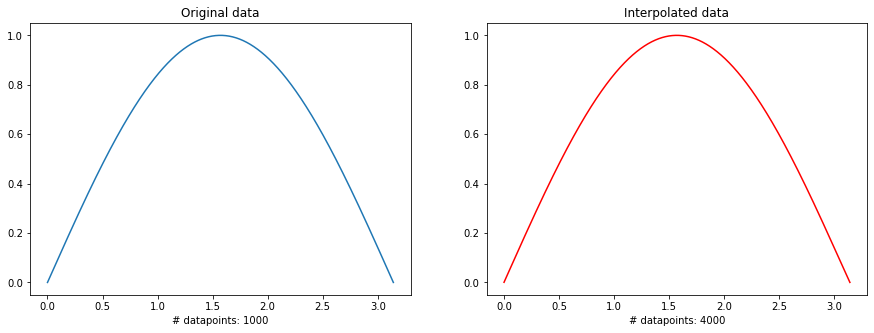

In [77]:
def datapoints_test(x):
    data_points = np.zeros(len(x))
    
    for i in range(len(x)):
        data_points[i] = np.sin(x[i])
        
    return data_points

def interpolate_ckf(n,d):
    ckf = np.zeros(n*d)
    for i in range(len(ckf)):
        ckf[i] = 1/n
        
    return ckf

x_test = np.linspace(0,np.pi,1000)

test_data = datapoints_test(x_test).real
ckf_test = interpolate_ckf(len(test_data), 4).real
int_test = interpolate(test_data,ckf_test).real
x_test_int = np.linspace(0,np.pi, len(int_test))


fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(15)
ax[0].plot(x_test, test_data)
ax[0].set_title("Original data")
ax[0].set_xlabel(f"# datapoints: {len(test_data)}")
ax[1].plot(x_test_int, int_test, color ="r")
ax[1].set_title("Interpolated data")
ax[1].set_xlabel(f"# datapoints: {len(int_test)}")
plt.show()





Now that we have made an interpolating function are we ready to test it with some datasets and functions. In this task are we going to use the Dirichlet kernel and the modified Dirichlet kernel to do this.

# Task 3

## 3a)

### I)

We consider the Dirichlet kernel for $n \in \mathbb{N} $ given by

$$ D_n(x) = \frac{1}{2n+1} \sum_{k=-n}^n e^{2 \pi i k x} $$

Want to derive the Furier coefficient $C_h (D_n) $

We have that

$$ C_h (D_n) = \int_{-\frac{1}{2}}^{\frac{1}{2}} (\frac{1}{2n+1} \sum_{k=-n}^n e^{2 \pi i k x}) e^{-2 \pi i h x} dx $$

$$ = \int_{-\frac{1}{2}}^{\frac{1}{2}} \frac{1}{2n+1} \sum_{k=-n}^n e^{2 \pi i k x} e^{-2 \pi i h x} dx $$

$$ = \int_{-\frac{1}{2}}^{\frac{1}{2}} \frac{1}{2n+1} \sum_{k=-n}^n e^{2 \pi i  x (k-h)} dx $$

Because integration is linear we get:

$$  \frac{1}{2n+1} \sum_{k=-n}^n \int_{-\frac{1}{2}}^{\frac{1}{2}} e^{2 \pi i  x (k-h)} dx $$

If $h \in [-n,n] $ can we split the sum into a part where $h=k$ and $h \neq k$.

$$  \underbrace{\frac{1}{2n+1} \sum_{k=-n}^n \int_{-\frac{1}{2}}^{\frac{1}{2}} e^{2 \pi i  x (k-h)} dx}_{k \neq h} 
+ \underbrace{\frac{1}{2n+1} \int_{-\frac{1}{2}}^{\frac{1}{2}} e^{2 \pi i  x (k-h)} dx}_{k=h}  $$

Looking at the part where $ k \neq h$

$$ \frac{1}{2n+1} \sum_{k=-n}^n \int_{-\frac{1}{2}}^{\frac{1}{2}} e^{2 \pi i  x (k-h)} dx $$

$$ \frac{1}{2n+1} \sum_{k=-n}^n \frac{1}{2\pi i (k-h)}  [e^{2 \pi i  x (k-h)}]_{-\frac{1}{2}}^{\frac{1}{2}} $$

$$ = \frac{1}{2n+1} \sum_{k=-n}^n \frac{1}{2\pi i (k-h)}  (e^{ \pi i  (k-h)} - e^{ - \pi i  (k-h)}) $$

We know that $ e^{\pi i} = e^{-\pi i} = -1 $

$$ = \frac{1}{2n+1} \sum_{k=-n}^n \frac{1}{2\pi i (k-h)}  \underbrace{((-1)^{(k-h)} - (-1)^{ (k-h)})}_0 $$

Thus all parts of the sum where $ k \neq h $ is $0$.
We see that this also applies for $ h \notin [-n,n] $. 

We know look at the part where $ k = h $

$$ \frac{1}{2n+1} \int_{-\frac{1}{2}}^{\frac{1}{2}} e^{2 \pi i  x (k-h)} dx $$

$$ \frac{1}{2n+1} \int_{-\frac{1}{2}}^{\frac{1}{2}} e^{2 \pi i  x (0)} dx $$

$$ \frac{1}{2n+1} \int_{-\frac{1}{2}}^{\frac{1}{2}} 1 dx = \frac{1}{2n+1} $$

Hence 

$$ C_h(D_n) =  \frac{1}{2n+1} $$
for $ h\in[-n,n] $

for $ n \in \mathbb{N} $ 

## II)

We also want to prove that the fundamental period in $V_{2n+1,D_n}$ exist. We introduce 

From 2e) we have that the fundamental period $I_{2n+1}$ exist if and only if 

$$ \sum_{z \in \mathbb{Z}} C_{h+(2n+1)z}(D_n) \neq 0$$.

And from the aliasing formula we get

$$ \sum_{z \in \mathbb{Z}} C_{h+(2n+1)z}(D_n) = \hat{D}_h $$

$$ \hat{D}_h = \frac{1}{2n+1} \sum_{j=0}^{2n} D_n(x_j) e^{-2 \pi i j h /(2n+1)} $$

$$ D_n(x_j) = \frac {1}{2n+1} \sum_{k=-n}^{k=n} e^{2 \pi i k x_j} =  \frac {1}{2n+1} \sum_{k=-n}^{k=n} e^{2 \pi i k j/(2n+1)} $$

$$ \hat{D}_h = \frac{1}{2n+1} \sum_{j=0}^{2n} \frac {1}{2n+1} \sum_{k=-n}^{k=n} e^{2 \pi i k j/(2n+1)} e^{-2 \pi i j h /(2n+1)} $$

$$\frac{1}{2n+1} \sum_{j=0}^{2n} \frac {1}{2n+1} \sum_{k=-n}^{k=n} \underbrace{e^{2 \pi i j(k-h)/(2n+1)}}_{\begin{cases} 
  1 & (k-h) mod (2n+1) \equiv 0 \\
  0 & else
  \end{cases}} $$

$$\frac{1}{2n+1}  \frac {1}{2n+1} \sum_{j=0}^{2n} \sum_{k=-n}^{k=n} \underbrace{e^{2 \pi i j(k-h)/(2n+1)}}_{\begin{cases} 
  1 & (k-h) mod (2n+1) \equiv 0 \\
  0 & else
  \end{cases}} $$
 
 

Since as shown earlier $ -n \leq h \leq  n  $  and we sum $ k $ from $-n$ $n$, $ (k-h) mod (2n+1) \equiv 0$ is only when $k = h$ that only happends once in the sum. 



$$\frac{1}{2n+1}  \frac {1}{2n+1} \sum_{j=0}^{2n} 1$$

$$ \frac{1}{2n+1} \frac {2n+1}{2n+1}= \frac {1}{2n+1} \neq 0$$
 
Hence the fundemental period in $V_{2n+1,D_n}$ exist. $\quad \quad \square$

In 2f) we found that $\hat{I_k} = \frac{1}{N} $ for $ \hat{I_k} \in V_{N,f}$ likewise 
$ \hat{I_k} = \frac{1}{2n+1}$ for$ \hat{I_k} \in V_{2n+1,D_n} $ which means

$$ \hat{I_k} = \hat{D_n} $$ 

Finding the fundemental interpolant:

We have proven fundamentalperiod exist in $V_{2n+1,D_n}$.

$$ \implies \hat{a}_h = \frac{1}{(2n+1)^2 \hat{D_n}} $$

And from 2e) we have

$$ C_h(I) = (2n+1) \hat{a}_h C_h(D_n) $$

Then we can calculate

$$ I(x) = \sum_{h \in \mathbb{Z}} C_h(I) e^{2 \pi i h x} $$

$$ = \sum_{h \in \mathbb{Z}}  \frac{1}{(2n+1) \hat{D_n}} C_h(D_n) e^{2 \pi i h x} $$

We have shown that $C_h(D_n) = \frac{1}{2n+1} $

$$ = \sum_{h \in \mathbb{Z}}  \frac{1}{(2n+1) \hat{D_n}} \frac{1}{2n+1} e^{2 \pi i h x} $$

$$ \frac{1}{(2n+1)^2} \sum_{h \in \mathbb{Z}} \frac{1}{\hat{D_n}} e^{2 \pi i h x}  $$

We have also shown that the sum is zero outside $-n \leq h \leq n$ so we get

$$ \frac{1}{(2n+1)^2} \sum_{h = -n}^{n} \frac{1}{\hat{D_n}} e^{2 \pi i h x}  $$

$$ \frac{1}{(2n+1)^2} \sum_{h = -n}^{n} (2n+1) e^{2 \pi i h x} $$

$$ I(x) =  \frac{1}{(2n+1)} \sum_{h = -n}^{n} e^{2 \pi i h x} $$

Dirichlet is its own fundamental interpolant!

We know want to plot the Dirichlet kernel for different n.


In [55]:
N = 1000_00
x = np.linspace(-1,1,N)

def Dirichlet(x,n):
    Sum = 0
    for k in range(-n,n+1):
        Sum += np.exp(2j* np.pi*k*x)
        
    return 1/(2*n+1)*Sum




n = 10

x = np.linspace(0,1,N)

def plot_Dir(x,N,n,name = False):
    diri = Dirichlet(x,n)
    zr = np.argwhere(np.abs(diri)< 10**-3.5)
    oner = np.argwhere(diri > 1 - 10**-4)
    
    plt.figure(figsize=(10,3))
    if(name):
        plt.title(f"Dirichlet kernel and its fundemental interpolant \n n = {n}")
    else:
        plt.title(f" n = {n}")
    plt.plot(x,diri.real,label="Dirichlet")
    for i in (zr):
        plt.plot(x[(i)],0,'ro')
    for i in (oner):
        plt.plot(x[i],1,'go')
    plt.legend()
    plt.show()

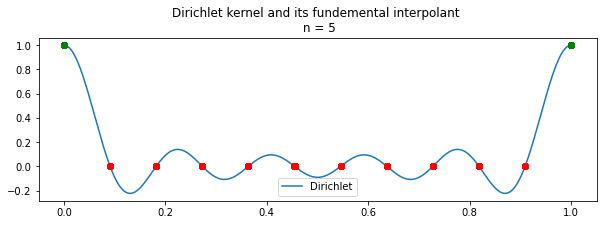

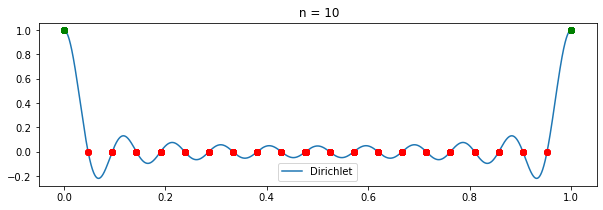

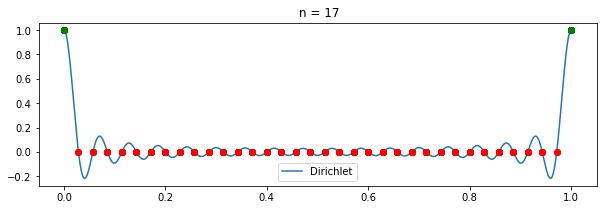

In [56]:
plot_Dir(x,N,5,True)
plot_Dir(x,N,10)
plot_Dir(x,N,17)

Interestingly from the plots above we see that for a any given n we get 2n points where the function is zero. 

# 3b)

Same procedure as in a) we want to prove that the fundemental period in $V_{2n,D_n}$ exist by proving

$$ \sum_{z \in \mathbb{Z}} C_{h+(2n)z}(D_n) \neq 0$$ 

$$ \sum_{z \in \mathbb{Z}} C_{h+(2n)z}(D_n) = \hat{D}_h $$

$$ \hat{D}_h = \frac{1}{2n} \sum_{j=0}^{2n-1} D_n(x_j) e^{-2 \pi i j h /(2n)} $$

$$ D_n(x_j) = \frac {1}{2n+1} \sum_{k=-n}^{k=n} e^{2 \pi i k x_j} =  \frac {1}{2n} \sum_{k=-n}^{k=n} e^{2 \pi i k j/(2n)} $$

$$ \hat{D}_h = \frac{1}{2n} \sum_{j=0}^{2n-1} \frac {1}{2n+1} \sum_{k=-n}^{k=n} e^{2 \pi i k j/(2n)} e^{-2 \pi i j h/(2n)} $$

$$ = \frac{1}{2n}  \frac {1}{2n+1} \sum_{j=0}^{2n-1} \sum_{k=-n}^{k=n} e^{2 \pi i j(k-h)/(2n)} $$


Looking at the sum $\sum_{k=-n}^{k=n} e^{2 \pi i j(k-h)/(2n)} $ we still have that $ h \in [-n,n]$. We have that 

$$\sum_{k=-n}^{k=n} \underbrace{e^{2 \pi i j(k-h)/(2n)}}_{\begin{cases} 
  1 & (k-h) mod (2n) \equiv 0 \\
  0 & else
  \end{cases}} $$
  
Which yields that the sum

$$\underbrace{\sum_{k=-n}^{k=n} e^{2 \pi i j(k-h/(2n)}}_{\begin{cases} 
  1 &   h \in <-n,n> \\
  2 & h = -n \quad or \quad h=n 
  \end{cases}} $$
  
Case one where the sum equal 1 comes from $(k-h) mod (2n) \equiv 0$ can only happen once, when $ k = h $ if $ -n < h < n $

While in the second case, when we look at the coefficients on the edges. Where $ h = -n$ or $h = n$. We get that $(k-h) mod (2n) \equiv 0$ for both $ k = h $ and $ k = -h$. 


Looking at case 1:

$$ \frac{1}{2n}  \frac {1}{2n+1} \sum_{j=0}^{2n-1} \sum_{k=-n}^{k=n} e^{2 \pi i j(k-h)/(2n)} $$

$$ = \frac{1}{2n}  \frac {1}{2n+1} \sum_{j=0}^{2n-1} 1 $$

$$ \frac{1}{2n}  \frac {1}{2n+1} 2n = \frac {1}{2n+1}$$


Looking at case 2:

$$ \frac{1}{2n}  \frac {1}{2n+1} \sum_{j=0}^{2n-1} \sum_{k=-n}^{k=n} e^{2 \pi i j(k-h)/(2n)} $$

$$ = \frac{1}{2n}  \frac {1}{2n+1} \sum_{j=0}^{2n-1} 2 $$

$$ \frac{1}{2n}  \frac {1}{2n+1} 4n = \frac {2}{2n+1} $$

Which both satisfy $$ \sum_{z \in \mathbb{Z}} C_{h+(2n)z}(D_n) = \hat{D}_h \neq 0 $$

Hence the fundamentalperiod exist in $V_{2n,D_n}$.



We know want to find the fundemental interpolant.
From 2g) we have that

$$ \hat{a}_h = \frac{\hat{g}}{N \hat{f}} $$

We have proven fundamentalperiod exist in $V_{2n,D_n}$.

$$ \implies \hat{a}_h = \frac{1}{(2n)^2 \hat{D_n}} $$

And from 2e) we have

$$ C_h(I) = 2n \hat{a}_h C_h(D_n) $$

Then we can calculate

$$ I(x) = \sum_{h \in \mathbb{Z}} C_h(I) e^{2 \pi i h x} $$

$$ = \sum_{h \in \mathbb{Z}}  \frac{1}{(2n) \hat{D_n}} C_h(D_n) e^{2 \pi i h x} $$

We have shown in 2a) that $C_h(D_n) = \frac{1}{2n+1} $

$$ = \sum_{h \in \mathbb{Z}}  \frac{1}{(2n) \hat{D_n}} \frac{1}{2n+1} e^{2 \pi i h x} $$

$$ \frac{1}{2n(2n+1)} \sum_{h \in \mathbb{Z}} \frac{1}{\hat{D_n}} e^{2 \pi i h x}  $$

We have also shown that the sum is zero outside $-n \leq h \leq n$ so we get

$$ \frac{1}{2n(2n+1)} \sum_{h = -n}^{n} \frac{1}{\hat{D_n}} e^{2 \pi i h x}  $$

We now need to split the sum because of the two cases above and we get;

$$\frac{1}{2n(2n+1)} \frac{2n+1}{2}(e^{-2 \pi i n x} + e^{2 \pi i n x} ) + \frac{1}{2n(2n+1)} \sum_{h = -n+1}^{n-1} (2n+1) e^{2 \pi i h x} $$ 

$$ = \frac{1}{4n}(e^{-2 \pi i n x} + e^{2 \pi i n x} ) + \frac{1}{2n} \sum_{h = -n+1}^{n-1}  e^{2 \pi i h x} $$

$$ I(x) = \frac{1}{2n}(\frac{1}{2}(e^{-2 \pi i n x} + e^{2 \pi i n x} )+\sum_{h = -n+1}^{n-1}  e^{2 \pi i h x} ) $$

This function is also called the modified Dirichlet kernel. In $V_{2n,Dn}$ the Dirichlet is no longer its own fundamental period. 

We know want to plot the modified Dirichlet kernel.

In [57]:
def MOD_dir(x,n):
    SIUU = 0
    for h in range(-n+1,n):
        SIUU += np.exp(2j* np.pi*h*x )
        
    return (1/(2*n)*(1/2*(np.exp(-2j*np.pi*n*x)+np.exp(2j*np.pi*n*x))+SIUU))


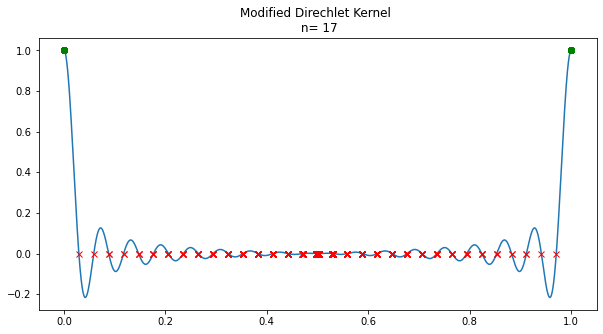

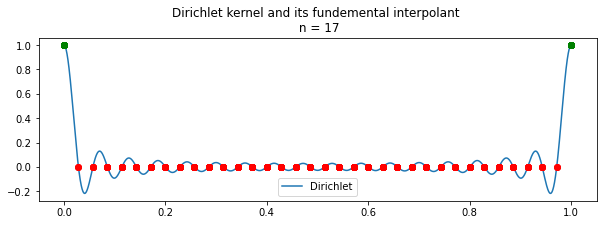

In [58]:
MOD_dir = MOD_dir(x,17).real

plt.figure(figsize=(10,5))
plt.title(f"Modified Direchlet Kernel \n n= {17}")
zr_MOD = np.argwhere(np.abs(MOD_dir)< 10**-4)
oner_MOD = np.argwhere(MOD_dir > 1 - 10**-4)
plt.plot(x,MOD_dir)
for i in (zr_MOD):
        plt.plot(x[(i)],0,'rx')
for i in (oner_MOD):
        plt.plot(x[i],1,'go')
plt.show()

plot_Dir(x,N,17,True)

We see that for the modified Dirichlet kernel we get 2n-1 zeros, while in the original Dirichlet kernel we have 2n. The modified Dirichlet is also stabilizing around zero in the central, while the original is oscillating around zero in the centre. 

We know use our interpolate function from 2g). It takes in the s5 dataset and the $c_h$ of the modified Dirichlet kernel $D^*$. 

As shown above 

$$ c_h(D^*) =  2n \hat{a}_h C_h(D_n) $$ 

$$\hat{a}_h = \frac{1}{(2n)^2 \hat{D_n}} $$

$$ c_h(D^*) = \frac{1}{(2n) \underbrace{\hat{D_n}}_{\begin{cases} 
  \frac{1}{2n+1} &   h \in <-n,n> \\
  \frac{2}{2n+1} & h = -n \quad or \quad h=n 
  \end{cases}}}  \frac{1}{2n+1} $$

$$ c_h(D^*) = {\begin{cases} 
  \frac{1}{2n} &   h \in <-n,n> \\
  \frac{1}{4n} & h = -n \quad or \quad h=n 
  \end{cases}} $$

In [59]:
def modified_dir_ckf(n,d): #We have calculated ckf analythicly.
    ''''
    The function takes in the n from the dataset we want to interpolate, and a factor
    d thats constructs d*n ckfs.
    
    returns the ckfs that we have calculated analythicly.
    '''
    ckf = np.zeros(d*(2*n),dtype = complex)
    point = int((d*(2*n)-(2*n))/2 -1)
    ckf[point] = 1/(4*n)
    ckf[point+(2*n+1)] = 1/(4*n)
    for i in range(0,d*((2*n))):
        if (ckf[i] == 1/(4*n)):
            continue
        elif(point < i < point+(2*n+1)):
            ckf[i] = 1/(2*n)
            
        else:
            ckf[i] = 1/(2*n)
            
            
        
    return ckf

In [60]:
col_list = ["x","s1","s2","s3", "s4","s5"]

df = pd.read_csv("signals.csv", usecols=col_list)


x5 = np.array(df["x"])
xa = np.linspace(0,1,len(x5)*4+4)
s5 = np.array(df["s5"],dtype=complex)
n=int(len(s5)/2)

ckf = modified_dir_ckf(n,4)
s6 = interpolate(s5,ckf).real

x5 = np.linspace(0,1,len(s5), endpoint = False)
x6 = np.linspace(0,1,len(s6), endpoint = False)

Text(0.5, 1.0, 's6 vs s5')

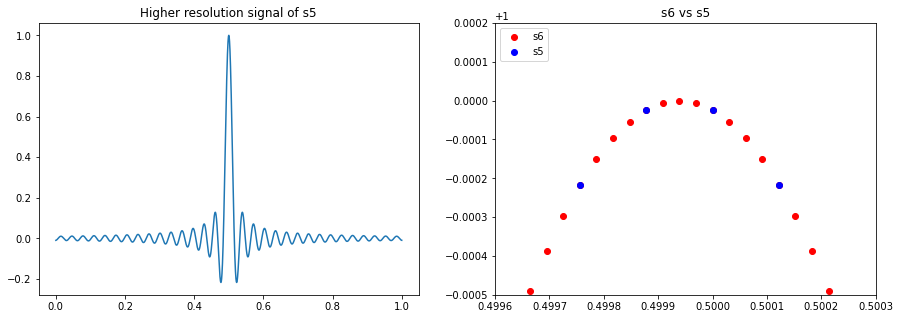

In [61]:
#Plotting
fig, axs = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(15)
axs[0].plot(x6,s6.real)
axs[0].set_title('Higher resolution signal of s5')
axs[1].plot(x6,s6.real,"ro",label="s6")
axs[1].plot(x5,s5.real,"bo",label="s5")
axs[1].legend(loc='upper left')
axs[1].set_xlim([0.4996,0.5003])
axs[1].set_ylim([0.9995,1.0002])
axs[1].set_title("s6 vs s5")

In the plot above we have the original signal in blue dots, and the interpolating constructed new signal in red. We can see that we succesfully managed to get a higher resolution in the plot with 4 times more datapoints.



## 3c)


We know want to prove that for 

$$ g = D_{\frac{n}{2}}(x) = \frac{1}{n+1} \sum_{k=-\frac{1}{2}}^{\frac{1}{2}} e^{2\pi i k x} \in V_{2n,D,n} $$

We have from 2e) that if $D_{\frac{n}{2}}(x) \in V_{2n,D,n} $ then 

$$c_k(D_{\frac{n}{2}}) = 2n \hat{a}_h c_k(D_n) $$ 

And we have from 3a) that.

$$ c_k(D_{n}) = \begin{cases} 
  \frac{1}{2n+1} &   k \in [-n,n] \\
  0 & else 
  \end{cases} $$
  

$$ c_k(D_{\frac{n}{2}}) = \begin{cases} 
  \frac{1}{n+1} &   k \in [-\frac{n}{2},\frac{n}{2}] \\
  0 & else 
  \end{cases} $$
  
If we look at at the case for $ n/2 < k < n $ we have that

$$c_k(D_{\frac{n}{2}}) = 0 $$
$$c_k(D_n) \neq 0 $$

By 

$$c_k(D_{\frac{n}{2}}) = 2n \hat{a}_h c_k(D_n) $$ 

$$ \implies \hat{a}_h = 0 $$

which as shown in 2e) since we know the statement is correct for one $\hat{a}$ then $D_{\frac{n}{2}}(x) \in V_{2n,D_n} $.


  
 
Solving for $\hat{a} $ we get.

$$ \hat{a}_h =  \begin{cases} 
  \frac{c_k(D_{\frac{n}{2}})}{2n c_k(D_n)} &   k \in [-\frac{n}{2},\frac{n}{2}] \\
  0 & [-n, -\frac{n}{2} > \\
  0 & <\frac{n}{2}, n]
  \end{cases} $$

$$ \hat{a}_h =  \begin{cases} 
  \frac{2n+1}{2n(n+1)} &   k \in [-\frac{n}{2},\frac{n}{2}] \\
  0 & [-n, -\frac{n}{2} > \\
  0 & <\frac{n}{2}, n]
  \end{cases} $$
  
Since $ h = 0,1,...,2n-1 $ and $ k = h + Nz, z \in \mathbb{Z}$, then we get.

$$ \hat{a}_h =  \begin{cases} 
  \frac{2n+1}{2n(n+1)} &   h = 0,1,....,\frac{n}{2}, \frac{3n}{2},...,2n-1 \\
  0 & \frac{n}{2} < h < \frac{3n}{2}
  \end{cases} $$
  
 
To find $a_h$ we need to take the Fourier inverse derived in 1g). 


  
We know want to show that 

$$ V_{n,D_{\frac{n}{2}}} \subset V_{2n,D_n} $$

and we have

$$ D_{\frac{n}{2}}(x) = \sum_{k=0}^{2n-1} a_k D_n (x - \frac{k}{2n})$$

We then get 

$$ V_{n,D_{\frac{n}{2}}} = [\sum_{k=0}^{2n-1} a_k D_n (x - \frac{k}{2n}),..., \sum_{k=0}^{2n-1} a_k D_n (x - \frac{k}{2n} - \frac{j}{n})] $$

$$ = [\sum_{k=0}^{2n-1} a_k D_n (x - \frac{k}{2n}),..., \sum_{k=0}^{2n-1} a_k D_n (x - \frac{k+2j}{2n} ]$$

$$ = [\sum_{k=0}^{2n-1} a_k \tau_{2n}^0 D_n ,..., \sum_{k=0}^{2n-1} a_k \tau_{2n}^{2j}D_n  ] \subset V_{2n,D_n}$$



  
 






# Task 4

We now want to take a closer look at DFT in 2 dimensions, and especially see what interesting things it can do for images. 

##  4a)


In [62]:
from matplotlib import image as mpimg #Importing to load images
from matplotlib.colors import LogNorm #useful to plot with logbased colors


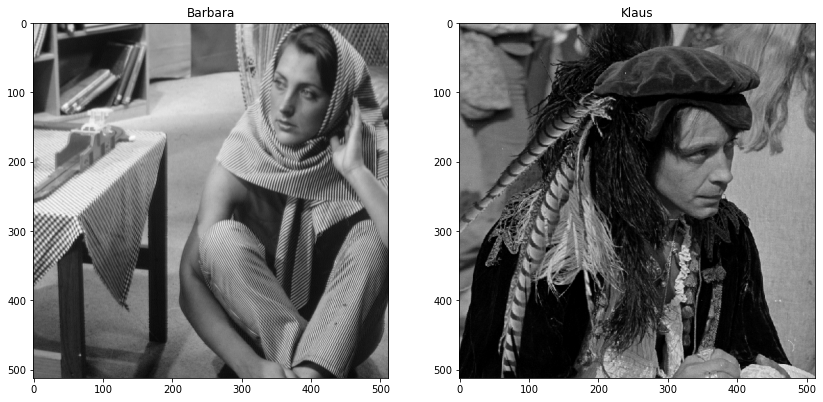

In [63]:

barbara = mpimg.imread("barbara.gif")
klaus = mpimg.imread("klaus.gif")


fig = plt.figure(figsize=(14, 16))
ax = fig.add_subplot(1, 2, 1)
ax.title.set_text("Barbara")
ax.axes
ax.imshow(barbara, cmap = 'gray')
ax2 = fig.add_subplot(1, 2, 2)
ax2.title.set_text("Klaus")
ax2.imshow(klaus, cmap = 'gray')
plt.show()



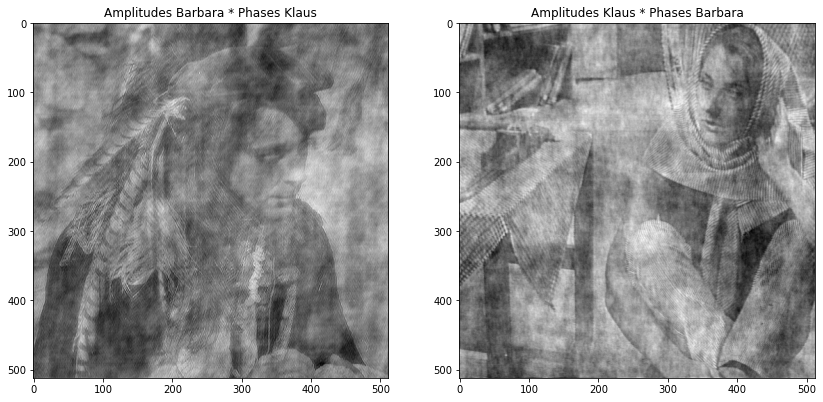

In [64]:
barbara_fft = sp.fft.fft2(barbara)
amplitudes_barbara = np.abs(barbara_fft)
phases_barbara = np.log(barbara_fft/amplitudes_barbara)/ 1j

klaus_fft = sp.fft.fft2(klaus)
amplitudes_klaus = np.abs(klaus_fft)
phases_klaus = np.log(klaus_fft/amplitudes_klaus)/ 1j

reconstruction1 = sp.fft.ifft2(amplitudes_barbara*np.exp(1j * phases_klaus))
reconstruction2 = sp.fft.ifft2(amplitudes_klaus*np.exp(1j * phases_barbara))
fig = plt.figure(figsize=(14, 16))
ax = fig.add_subplot(1, 2, 1)
ax.title.set_text("Amplitudes Barbara * Phases Klaus")
ax.imshow(reconstruction1.real, cmap = 'gray')
ax2 = fig.add_subplot(1, 2, 2)
ax2.title.set_text("Amplitudes Klaus * Phases Barbara")
ax2.imshow(reconstruction2.real, cmap = 'gray')
plt.show()

When we recreate the pictures with the amplitudes of one picture with the phases of the other, the resulting image is closest to the one it got phases from. Using the amplitudes from the other image just makes it foggy, but it is still clear to see its main features. Comparing this to the other case where we keep the amplitudes but use the phases from the other image, the resulting image has no visible similarities to the original. With this in mind, we conclude that the phases are much more important to the features of the image than the amplitudes, and it is the thing to store if you want to recreate an image. 

## 4b)

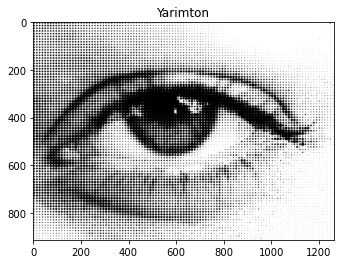

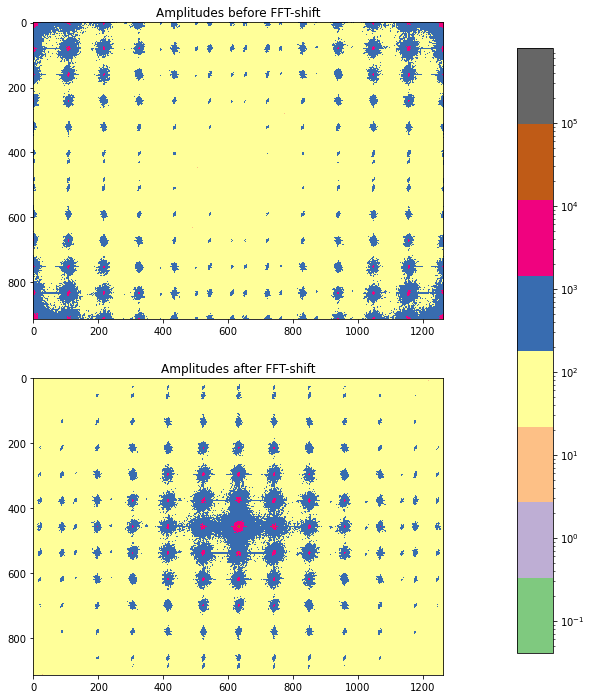

In [65]:
Yarimton = mpimg.imread("Yarimton-dithered.png")

Yarimton_gs = Yarimton[:,:,0]*0.3 + Yarimton[:,:,1]*0.59 + Yarimton[:,:,2]*0.11 #using luminosity method to get rgb to greyscale.
plt.imshow(Yarimton_gs, cmap = "gray") #Plots the original Yarimton image
plt.title("Yarimton")
plt.show()

fft_Yarimton_gs = sp.fft.fft2(Yarimton_gs)
amp_Y = np.abs(fft_Yarimton_gs)

Y_shifted = sp.fft.fftshift(fft_Yarimton_gs)

#Plotts Amplitudes of Yarimton before and after FFTshift.
fig = plt.figure(figsize=(10, 12))   
ax = fig.add_subplot(2, 1, 1)
ax.title.set_text("Amplitudes before FFT-shift")
im = ax.imshow(amp_Y, norm= LogNorm(), cmap = "Accent")
ax2 = fig.add_subplot(2, 1, 2)
ax2.title.set_text("Amplitudes after FFT-shift")
ax2.imshow(np.abs(Y_shifted), norm= LogNorm(), cmap = "Accent")
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.show()



The plot of the amplitudes of Yarimton after the fast Fourier transform is very interesting in a couple of ways. The first thing is that almost all the amplitudes are very big $ \left( > 10^{1} \right)$. That is probably because in the dotted image each pixel has a discrete color specter, either black or white (0 or 1), and most of the points are white with value 1. Comparing this to a continuous specter with greyscales between black and white, the sum of all the pixels is much higher. In addition, the image is far from periodic, so the Fourier transform requires more periodic functions, and bigger coefficients to recreate the image well. The other interesting thing is that the biggest amplitudes is located at the edges and near the corners. The biggest amplitudes corresponding phases are the phases that is most important to the original image’s main features. On the other hand, the corresponding phases to the small amplitudes is more important to the get the precise tuning of dots. 

Using what we figured above, we would like to make the corresponding phases to the small amplitudes, not contribute to the image. One way to accomplish this is to shift the matrix with scipy.fftshift. This manipulates the matrix such that the indicis on the edges is transferred to the middle. Now that the phases we want to keep is in the middle, we make a simple filter which makes all the amplitudes further away from the center than a given r to zero. This should result in an image without "half-toning" but with a bit more blur than the original. 



In [66]:
def remove_halfToning(image, r):
    fft_image = sp.fft.fft2(image)
    fft_image_shifted = sp.fft.fftshift(fft_image) #shifts the low amplitudes to the edges
    
    for i in range(fft_image_shifted[1].size):
        for j in range(fft_image_shifted[:, 1].size):
            if (np.sqrt(np.abs(i-(fft_image_shifted[1].size/2))**2+ np.abs(j-(fft_image_shifted[:,1].size/2))**2) > r): # makes all the magnitudes further than r from the center to zero. 
                fft_image_shifted[j, i] = 0

    fft_image_removed = sp.fft.ifftshift(fft_image_shifted)
    image_removed = sp.fft.ifft2(fft_image_removed)
    return image_removed

<function matplotlib.pyplot.show(close=None, block=None)>

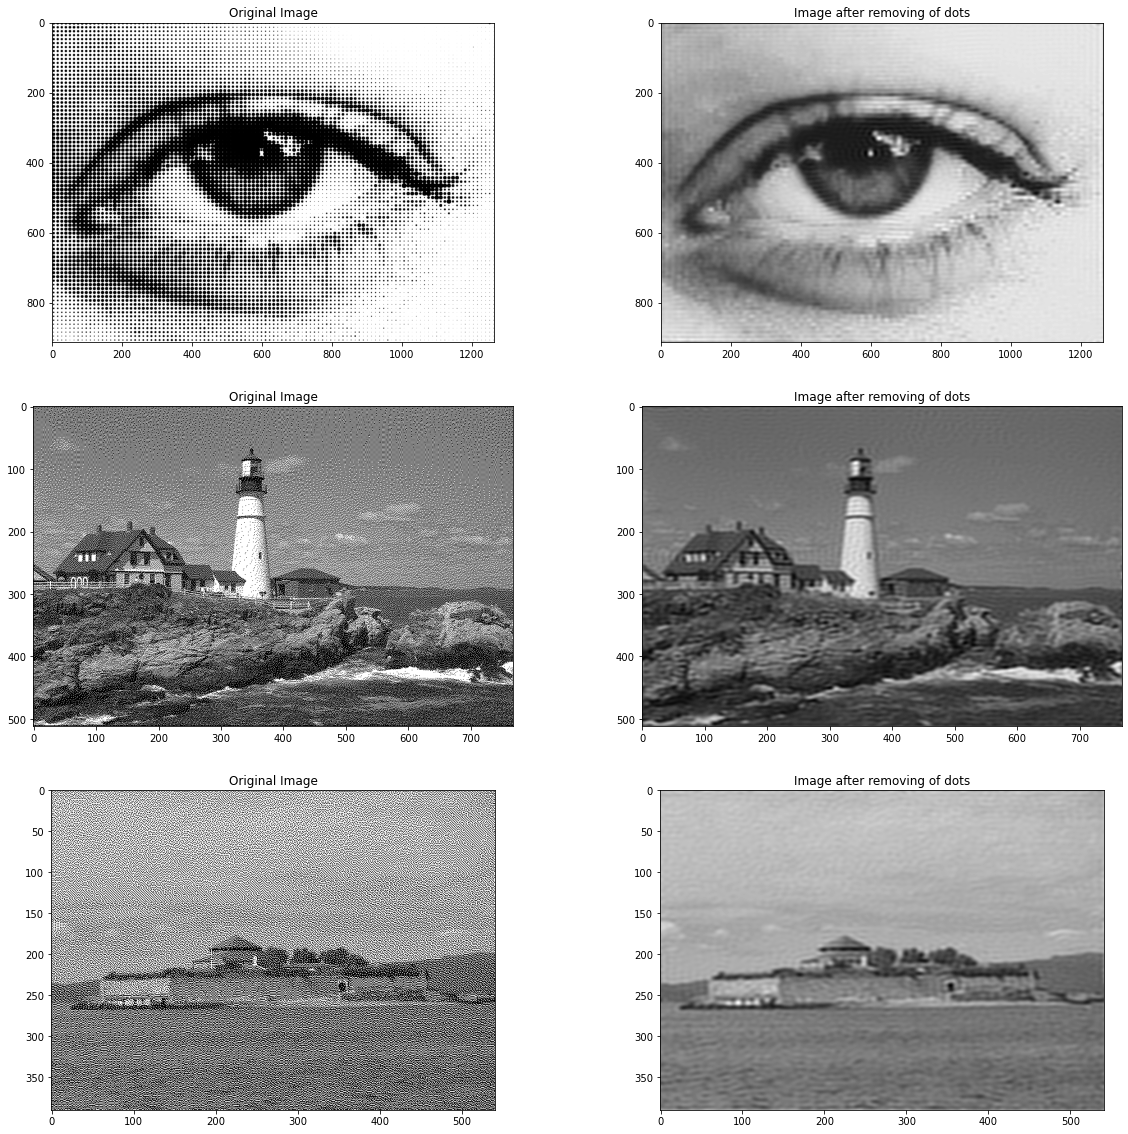

In [67]:
Y = remove_halfToning(Yarimton_gs, 70)
lighthouse = mpimg.imread('lighthouse-dithered.png')
g = remove_halfToning(lighthouse, 70)
munkholmen = mpimg.imread('munkholmen-dithered.png')
m = remove_halfToning(munkholmen, 60)


fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(3, 2, 1)
ax.title.set_text("Original Image")
ax.imshow(Yarimton_gs, cmap = 'gray')
ax2 = fig.add_subplot(3, 2, 2)
ax2.title.set_text("Image after removing of dots")
ax2.imshow(Y.real, cmap = 'gray')
ax3 = fig.add_subplot(3, 2, 3)
ax3.title.set_text("Original Image")
ax3.imshow(lighthouse, cmap = 'gray')
ax4 = fig.add_subplot(3, 2, 4)
ax4.title.set_text("Image after removing of dots")
ax4.imshow(g.real, cmap = 'gray')
ax5 = fig.add_subplot(3, 2, 5)
ax5.title.set_text("Original Image")
ax5.imshow(munkholmen, cmap = 'gray')
ax6 = fig.add_subplot(3, 2, 6)
ax6.title.set_text("Image after removing of dots")
ax6.imshow(m.real, cmap = 'gray')
plt.show



## 4c)

We want to look write the space of translates for the 2d case considering a function $F: \mathbb{T}^2 = [0,1)^2 \rightarrow \mathbb{C}$ and $\textbf{N} = (N_1, N_2)^T$. 

We define $F(\textbf{x}) = f_1(x_1) \bigotimes f_2(x_2)$, using definition of a tensor product. $f_1$ and $f_2$ have each 
$V_{N_i,f_i} = span(f_i, \tau _{N_i}f_i, \tau _{N_i}^2 f_i, ..., \tau _{N_i}^{N_i-1}f_i)$. 

The space $V_{\textbf{N}, F}$ for the 2D case is then the tensor product of these two spaces. 


As we have seen in this project, Discrete Fourier Transform is very useful in signal processing, but going all the way to the result is not trivial, and finding it requires thorough mathematical and computational understanding. Even though we did not get all the way to the result in all of the tasks, we have learned a lot about DFT and FFT.